In [1]:
import finterstellar as fs

In [ ]:
# 3.4

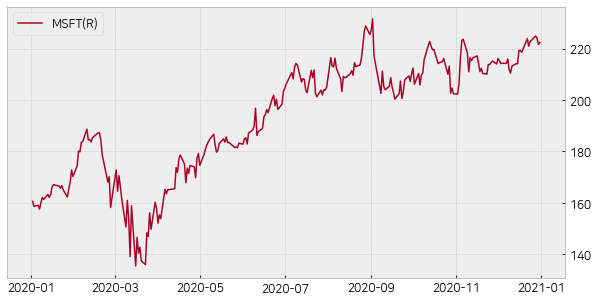

In [2]:
symbol = 'MSFT'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

```python
def macd(df, short=12, long=26, signal=9):
    '''
    Calculate MACD indicators
    :param df: Dataframe containing historical prices
    :param short: Day length of short term MACD
    :param long: Day length of long term MACD
    :param signal: Day length of MACD signal
    :return: Dataframe of MACD values
    '''
    symbol = df.columns[0]
    df['ema_short'] = df[symbol].ewm(span=short).mean()
    df['ema_long'] = df[symbol].ewm(span=long).mean()
    df['macd'] = (df['ema_short'] - df['ema_long']).round(2)
    df['macd_signal'] = df['macd'].ewm(span=signal).mean().round(2)
    df['macd_oscillator'] = (df['macd'] - df['macd_signal']).round(2)
    return df[[symbol, 'macd','macd_signal','macd_oscillator']]
```

In [3]:
fs.macd(df)

MSFT  macd  macd_signal  macd_oscillator
2020-01-02 160.62  0.00         0.00             0.00
2020-01-03 158.62 -0.04        -0.02            -0.02
2020-01-06 159.03 -0.04        -0.03            -0.01
2020-01-07 157.58 -0.10        -0.05            -0.05
2020-01-08 160.09 -0.02        -0.04             0.02
...           ...   ...          ...              ...
2020-12-24 222.75  2.24         1.37             0.87
2020-12-28 224.96  2.55         1.61             0.94
2020-12-29 224.15  2.69         1.82             0.87
2020-12-30 221.68  2.57         1.97             0.60
2020-12-31 222.42  2.51         2.08             0.43

[253 rows x 4 columns]

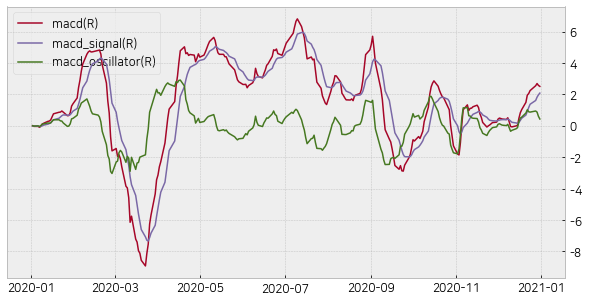

In [4]:
fs.draw_chart(df, right=['macd','macd_signal','macd_oscillator'])

```python
def indicator_to_signal(df, factor, buy, sell):
    '''
    Makes buy or sell signals according to factor indicator
    :param df: The dataframe containing stock prices and indicator data
    :param factor: The indicator to determine how to trade
    :param buy: The price level to buy
    :param sell: The price level to sell
    :return: The dataframe containing trading signal
    '''
    df['trade'] = np.nan
    if buy >= sell:
        df['trade'].mask(df[factor]>buy, 'buy', inplace=True)
        df['trade'].mask(df[factor]<sell, 'zero', inplace=True)
    else:
        df['trade'].mask(df[factor]<buy, 'buy', inplace=True)
        df['trade'].mask(df[factor]>sell, 'zero', inplace=True)
    df['trade'].fillna(method='ffill', inplace=True)
    df['trade'].fillna('zero', inplace=True)
    return df['trade']
```

In [5]:
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08     buy
              ... 
2020-12-24     buy
2020-12-28     buy
2020-12-29     buy
2020-12-30     buy
2020-12-31     buy
Name: trade, Length: 253, dtype: object

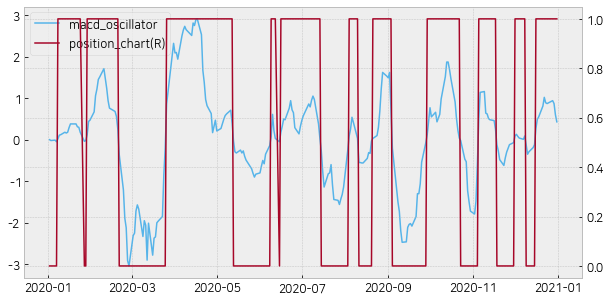

In [6]:
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

```python
def draw_trade_results(df):
    '''
    Draw portfolio return and position changes
    :param df: Dataframe that contains data to plot
    :return: Portfolio return and position chart
    '''
    fig, ax1 = plt.subplots()
    x = df.index
    ax1.plot(x, df['acc_rtn_dp'], label='Return', color='C6', alpha=.7)
    ax1.grid(False, axis='y')
    # secondary y
    ax2 = ax1.twinx()
    ax2.plot(x, df.iloc[:,0], label=df.columns[0], color='C1', alpha=1)
    ax1.plot(np.nan, label=df.columns[0]+'(R)', color='C1')
    # 3rd y
    ax3 = ax1.twinx()
    ax3.fill_between(x, 0, df['position_chart'], color='C2', alpha=.5)
    ax3.set_ylim(0, 10)
    ax3.axes.yaxis.set_visible(False)
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
```

CAGR: 23.49%
Accumulated return: 23.49%
Average return: 2.15%
Benchmark return : 38.48%
Number of trades: 11
Number of win: 6
Hit ratio: 54.55%
Investment period: 1.0yrs
Sharpe ratio: 0.77
MDD: -11.28%
Benchmark MDD: -28.24%


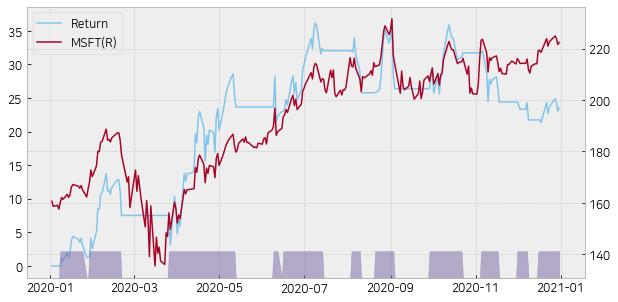

In [7]:
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 3.5

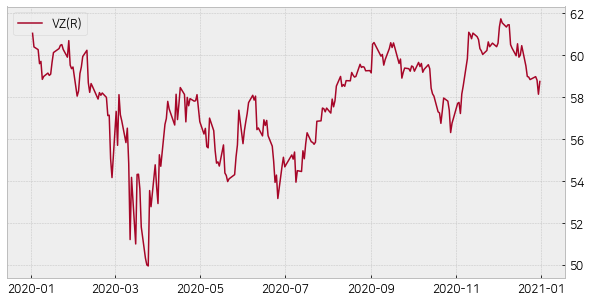

In [8]:
symbol = 'VZ'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

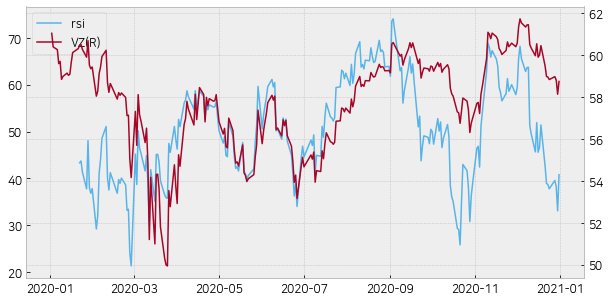

In [9]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right=symbol)

CAGR: 7.22%
Accumulated return: 6.80%
Average return: 4.17%
Benchmark return : -2.86%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.21
MDD: -17.10%
Benchmark MDD: -18.20%


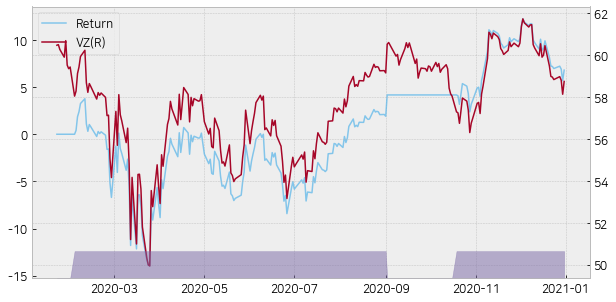

In [10]:
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: -2.94%
Accumulated return: -2.77%
Average return: -2.77%
Benchmark return : -2.86%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.9yrs
Sharpe ratio: -1.17
MDD: -2.90%
Benchmark MDD: -17.73%


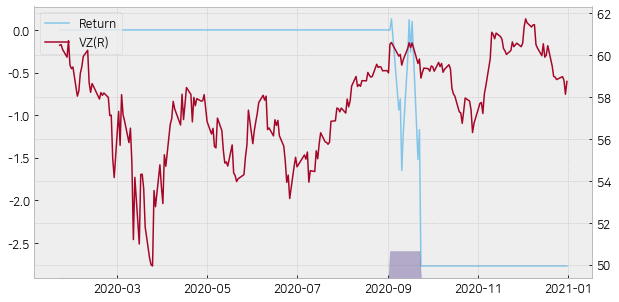

In [11]:
fs.indicator_to_signal(df, factor='rsi', buy=70, sell=50)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 3.7

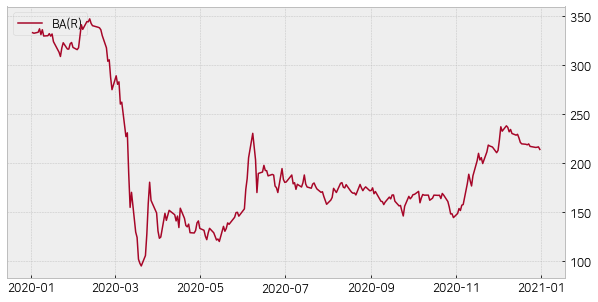

In [12]:
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

```python
def envelope(df, w=50, spread=.05):
    '''
    Calculate Envelope indicators
    :param df: Dataframe containing historical prices
    :param w: Window size
    :param spread: % difference from center line to determine band width
    :return: Dataframe of Envelope values
    '''
    symbol = df.columns[0]
    df['center'] = df[symbol].rolling(w).mean()
    df['ub'] = df['center']*(1+spread)
    df['lb'] = df['center']*(1-spread)
    return df[[symbol, 'center','ub','lb']]
```

In [13]:
fs.envelope(df, w=20, spread=.1)
df.tail()

BA  center     ub     lb
2020-12-24 217.15  225.27 247.80 202.75
2020-12-28 216.09  225.25 247.78 202.73
2020-12-29 216.25  225.53 248.08 202.98
2020-12-30 216.67  225.71 248.28 203.14
2020-12-31 214.06  225.22 247.74 202.70

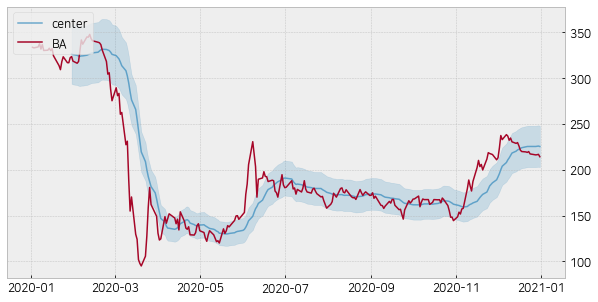

In [14]:
fs.draw_band_chart(df)

In [15]:
fs.band_to_signal(df, buy='A', sell='B')

2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%


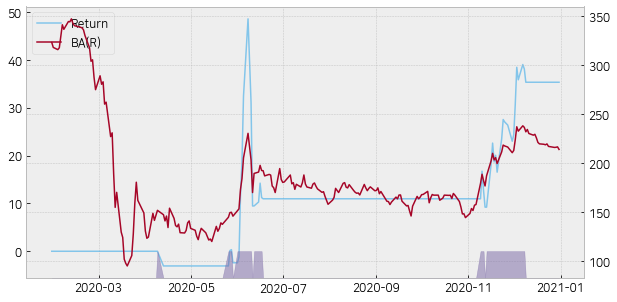

In [16]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

```python
def band_to_signal(df, buy, sell):
    '''
    Makes buy or sell signal according to band formation
    :param df: The dataframe containing stock prices and band data
    :param buy: The area in band to buy
    :param sell: The area in band to sell
    :return: The dataframe containing trading signal
    '''
    symbol = df.columns[0]
    df['trade'] = np.nan
    # buy
    if buy == 'A':
        df['trade'].mask(df[symbol]>df['ub'], 'buy', inplace=True)
    elif buy == 'B':
        df['trade'].mask((df['ub']>df[symbol]) & (df[symbol]>df['center']), 'buy', inplace=True)
    elif buy == 'C':
        df['trade'].mask((df['center']>df[symbol]) & (df[symbol]>df['lb']), 'buy', inplace=True)
    elif buy == 'D':
        df['trade'].mask((df['lb']>df[symbol]), 'buy', inplace=True)
    # zero
    if sell == 'A':
        df['trade'].mask(df[symbol]>df['ub'], 'zero', inplace=True)
    elif sell == 'B':
        df['trade'].mask((df['ub']>df[symbol]) & (df[symbol]>df['center']), 'zero', inplace=True)
    elif sell == 'C':
        df['trade'].mask((df['center']>df[symbol]) & (df[symbol]>df['lb']), 'zero', inplace=True)
    elif sell == 'D':
        df['trade'].mask((df['lb']>df[symbol]), 'zero', inplace=True)
    df['trade'].fillna(method='ffill', inplace=True)
    df['trade'].fillna('zero', inplace=True)
    return df['trade']
```

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.79%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.66%


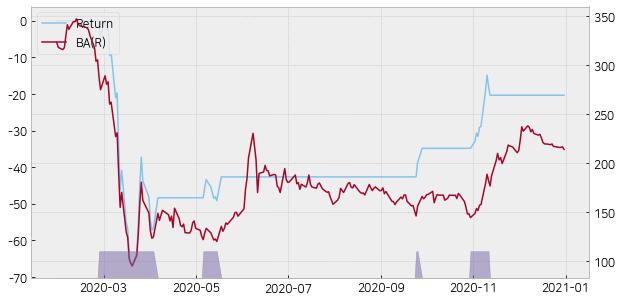

In [17]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 3.9

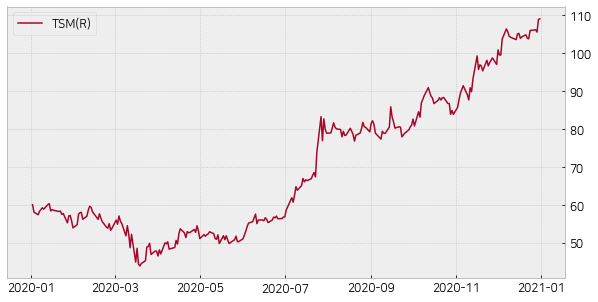

In [18]:
symbol = 'TSM'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

```python
def bollinger(df, w=20, k=2):
    '''
    Calculate bollinger band indicators
    :param df: Dataframe containing historical prices
    :param w: Window size
    :param k: Multiplier to determine band width
    :return: Dataframe of bollinger band values
    '''
    symbol = df.columns[0]
    df['center'] = df[symbol].rolling(w).mean()
    df['sigma'] = df[symbol].rolling(w).std()
    df['ub'] = df['center'] + k * df['sigma']
    df['lb'] = df['center'] - k * df['sigma']
    return df[[symbol, 'center','ub','lb']]
```

In [19]:
fs.bollinger(df, w=20, k=2)
df.tail()

TSM  center  sigma     ub     lb
2020-12-24 105.97  103.23   2.62 108.48  97.98
2020-12-28 106.15  103.60   2.48 108.55  98.65
2020-12-29 105.56  104.03   1.96 107.96 100.10
2020-12-30 108.90  104.43   2.10 108.63 100.23
2020-12-31 109.04  104.91   2.01 108.92 100.89

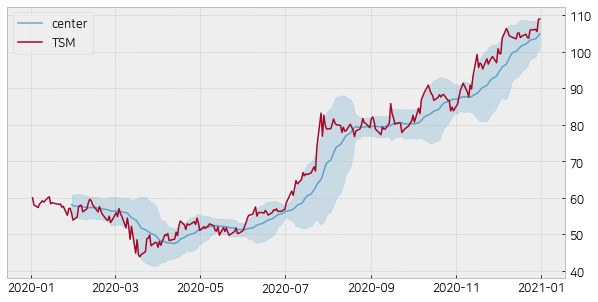

In [20]:
fs.draw_band_chart(df)

CAGR: 9.12%
Accumulated return: 8.40%
Average return: 0.86%
Benchmark return : 95.41%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.76%
Benchmark MDD: -27.24%


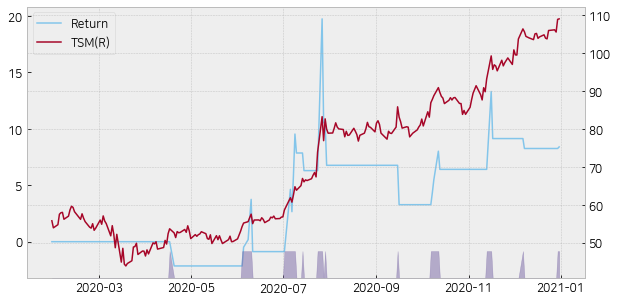

In [21]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 15.37%
Accumulated return: 14.15%
Average return: 4.53%
Benchmark return : 95.41%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -15.97%
Benchmark MDD: -26.40%


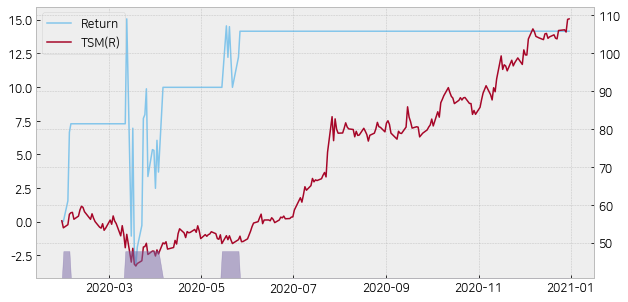

In [22]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

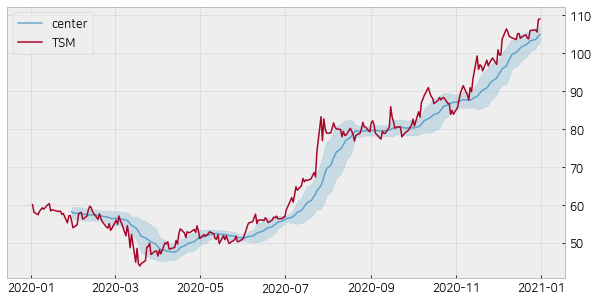

In [23]:
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.bollinger(df, w=20, k=1)
fs.draw_band_chart(df)

CAGR: 21.69%
Accumulated return: 19.97%
Average return: 1.27%
Benchmark return : 95.41%
Number of trades: 20
Number of win: 5
Hit ratio: 25.00%
Investment period: 0.9yrs
Sharpe ratio: 0.60
MDD: -14.60%
Benchmark MDD: -27.24%


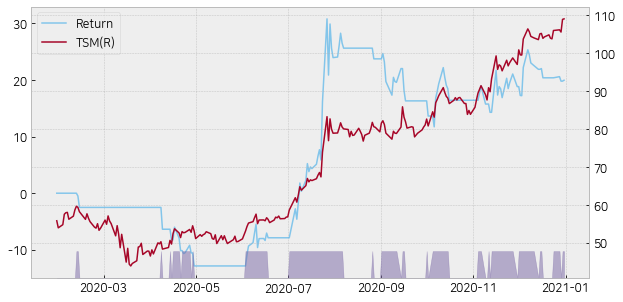

In [24]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 35.70%
Accumulated return: 32.86%
Average return: 2.75%
Benchmark return : 95.41%
Number of trades: 8
Number of win: 7
Hit ratio: 87.50%
Investment period: 0.9yrs
Sharpe ratio: 0.96
MDD: -19.48%
Benchmark MDD: -26.40%


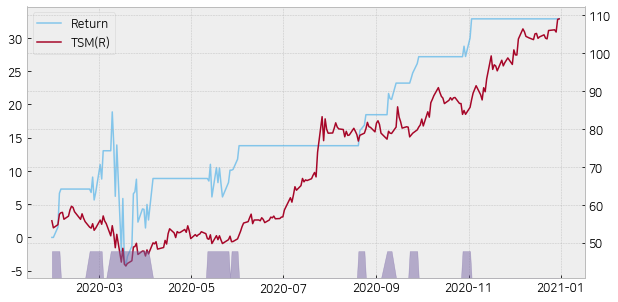

In [25]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [26]:
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
df = fs.bollinger(df, w=20, k=1)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')

In [27]:
fs.combine_signal_or(df, 's1', 's2')

TSM  center     ub     lb trade    s1    s2
2020-01-02  60.04     nan    nan    nan  zero  zero  zero
2020-01-03  58.06     nan    nan    nan  zero  zero  zero
2020-01-06  57.39     nan    nan    nan  zero  zero  zero
2020-01-07  58.32     nan    nan    nan  zero  zero  zero
2020-01-08  58.75     nan    nan    nan  zero  zero  zero
...           ...     ...    ...    ...   ...   ...   ...
2020-12-24 105.97  103.23 105.86 100.61   buy   buy  zero
2020-12-28 106.15  103.60 106.08 101.13   buy   buy  zero
2020-12-29 105.56  104.03 105.99 102.07  zero  zero  zero
2020-12-30 108.90  104.43 106.53 102.33   buy   buy  zero
2020-12-31 109.04  104.91 106.91 102.90   buy   buy  zero

[253 rows x 7 columns]

CAGR: 52.29%
Accumulated return: 48.14%
Average return: 1.69%
Benchmark return : 95.41%
Number of trades: 28
Number of win: 12
Hit ratio: 42.86%
Investment period: 0.9yrs
Sharpe ratio: 1.03
MDD: -20.23%
Benchmark MDD: -27.24%


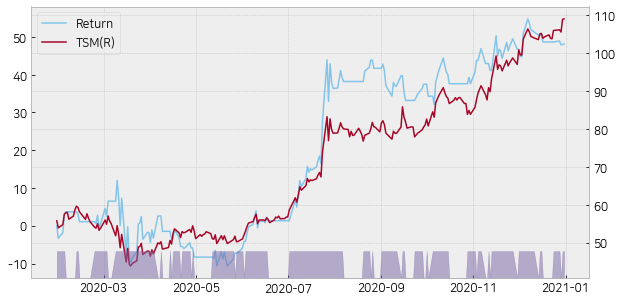

In [28]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 3.10

```python
def get_ohlc(symbol, start_date=None, end_date=None):
    '''
    :param symbol: Symbol or ticker of equity by finance.yahoo.com
    :param start_date: The first date of period
    :param end_date: The last date of period
    :return: historical open, high, low, close prices and trade volume
    '''
    end_date = pd.to_datetime(end_date).date() if end_date else pd.Timestamp.today().date()
    start_date = pd.to_datetime(start_date).date() if start_date else util.months_before(end_date, 12)
    df = web.DataReader(symbol, 'yahoo', start=start_date, end=end_date).round(2)
    return df

```

In [29]:
symbol = 'DAL'
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
df.tail()

High   Low  Open  Close    Volume  Adj Close
2020-12-24 40.44 39.60 40.42  39.73   5176400      39.73
2020-12-28 40.78 40.01 40.27  40.15  10654400      40.15
2020-12-29 40.84 39.90 40.84  40.03   8142800      40.03
2020-12-30 40.91 39.89 40.00  40.56   8504600      40.56
2020-12-31 40.74 39.76 40.30  40.21   8705700      40.21

```python
def stochastic(df, symbol, n=14, m=3, t=3):
    '''
    Calculate stochastic indicators
    :param df: Dataframe containing historical prices
    :param symbol: Symbol or ticker of equity by finance.yahoo.com
    :param n: Day length of fast k stochastic
    :param m: Day length of slow k stochastic
    :param t: Day length of slow d stochastic
    :return: Dataframe of stochastic values
    '''
    try:
        df['fast_k'] = ( ( df['Close'] - df['Low'].rolling(n).min() ) / ( df['High'].rolling(n).max() - df['Low'].rolling(n).min() ) ).round(4) * 100
        df['slow_k'] = df['fast_k'].rolling(m).mean().round(2)
        df['slow_d'] = df['slow_k'].rolling(t).mean().round(2)
        df.rename(columns={'Close':symbol}, inplace=True)
        df.drop(columns=['High','Open','Low','Volume','Adj Close','fast_k'], inplace=True)
        return df[[symbol, 'slow_k', 'slow_d']]
    except:
        return 'Error. The stochastic indicator requires OHLC data and symbol. Try get_ohlc() to retrieve price data.'
```

In [30]:
fs.stochastic(df, symbol, n=14, m=3, t=3)

DAL  slow_k  slow_d
2020-01-02 59.04     nan     nan
2020-01-03 58.06     nan     nan
2020-01-06 57.66     nan     nan
2020-01-07 57.61     nan     nan
2020-01-08 58.85     nan     nan
...          ...     ...     ...
2020-12-24 39.73   17.11   18.44
2020-12-28 40.15   25.84   20.44
2020-12-29 40.03   24.35   22.43
2020-12-30 40.56   32.62   27.60
2020-12-31 40.21   35.93   30.97

[253 rows x 3 columns]

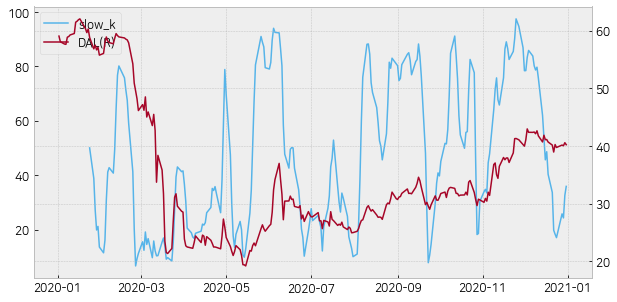

In [31]:
fs.draw_chart(df, left='slow_k', right=symbol)

CAGR: -30.16%
Accumulated return: -27.93%
Average return: -1.64%
Benchmark return : -30.05%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.37
MDD: -61.71%
Benchmark MDD: -69.06%


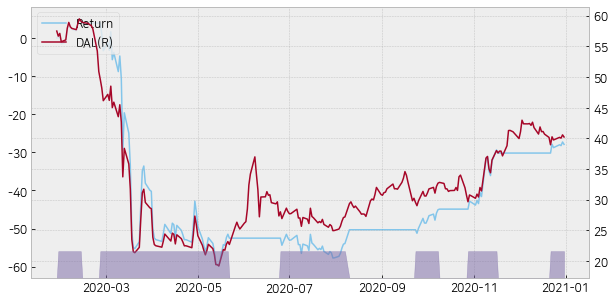

In [32]:
fs.indicator_to_signal(df, factor='slow_k', buy=20, sell=80)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [33]:
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.stochastic(df, symbol, n=14, m=3, t=3)
df.tail()

DAL  slow_k  slow_d
2020-12-24 39.73   17.11   18.44
2020-12-28 40.15   25.84   20.44
2020-12-29 40.03   24.35   22.43
2020-12-30 40.56   32.62   27.60
2020-12-31 40.21   35.93   30.97

In [34]:
df['indicator'] = df['slow_k'] - df['slow_d']
df.tail()

             DAL  slow_k  slow_d  indicator
2020-12-24 39.73   17.11   18.44      -1.33
2020-12-28 40.15   25.84   20.44       5.40
2020-12-29 40.03   24.35   22.43       1.92
2020-12-30 40.56   32.62   27.60       5.02
2020-12-31 40.21   35.93   30.97       4.96


CAGR: -2.96%
Accumulated return: -2.74%
Average return: 0.69%
Benchmark return : -30.05%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.06
MDD: -53.57%
Benchmark MDD: -69.06%


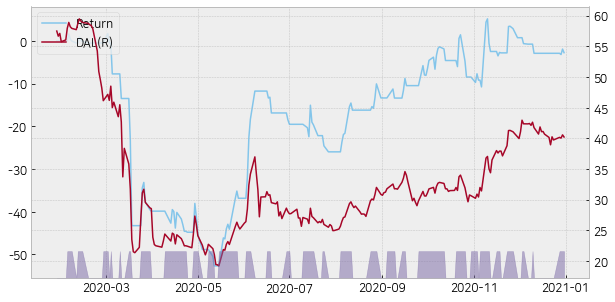

In [35]:
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)